# Tutorial on Function Approximation
## with Neural Networks

In [1]:
%%capture
import numpy as np
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from FunctionApproximator.FunctionApproximator import FunctionApproximator
from utils import plot_2D_functions
import matplotlib

We first try to approximate a continuous function that takes a 2D point as input:
$$
  f(x, y)=\exp\left(-10\cdot\left(x^2+y^2\right)\right)
$$
here we define the function $f$ and generate a set of points $X$ in the domain of $f$ and the set of values of $f$ of those points which we call $y$. This will be the training set with which we will fit a function approximator $f_{apx}\approx f$.

In [2]:
def f(x,y):
    return np.exp(-(np.square(x) + np.square(y)))

In [3]:
xlist = np.linspace(-1, 1, 100)
ylist = np.linspace(-1, 1, 100)
xgrid, ygrid = np.meshgrid(xlist, ylist)
# The training dataset.
X = np.vstack([xgrid.ravel(), ygrid.ravel()]).T
# The true function value for the vectors in the training dataset.
y = np.zeros(X.shape[0])
for i in range(0, X.shape[0]):
    y[i] = f(X[i,0], X[i,1])

We initialize and train a function approximator $f_{apx}\approx f$ using a neural network defined in *FunctionApproximator.py* .

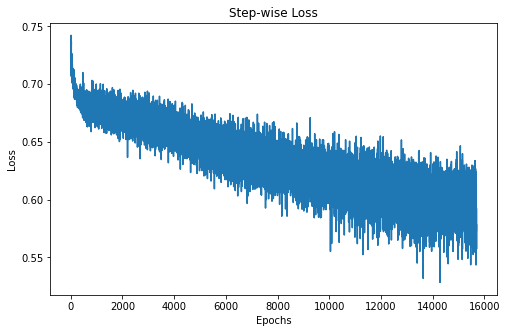

In [4]:
# Instanciate a function approximator with the training data.
fa = FunctionApproximator()
fa.load_data(X, y)
# Find a function that approximates the data.
fa.train(num_epochs = 100, learning_rate = 0.01)
approx_f = fa.approximate_function()

Here, since we are in the two dimensional case we can visualize both the true function $f$ and its approximation $f_{apx}$ that we obtained above.

/home/im2ag/Desktop/M2/Internship_INRIA/bilevel-optimization/src/utils.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


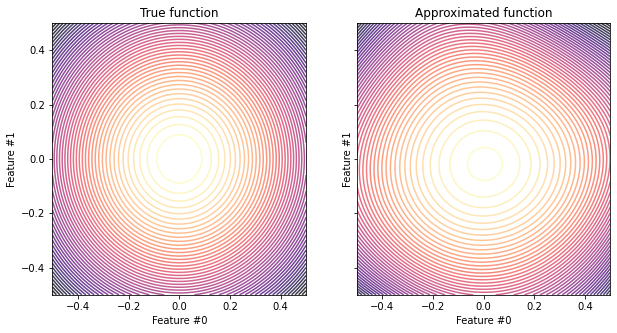

In [5]:
# Visialize the approximation accuracy.
plot_2D_functions(f, approx_f, plot_x_lim=0.5, plot_y_lim=0.5, plot_nb_contours=50)

Let's try with the Ackley function.

In [14]:
from scipy.optimize import rosen

def banana(x,y):
    return rosen(np.array([x,y]))

In [15]:
xlist = np.linspace(-3.5, 3.5, 100)
ylist = np.linspace(-9, 9, 100)
xgrid, ygrid = np.meshgrid(xlist, ylist)
# The training dataset.
X = np.vstack([xgrid.ravel(), ygrid.ravel()]).T
# The true function value for the vectors in the training dataset.
y = np.zeros(X.shape[0])
for i in range(0, X.shape[0]):
    y[i] = banana(X[i,0], X[i,1])

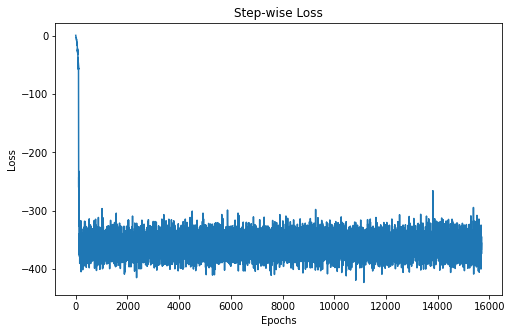

In [10]:
# Instanciate a function approximator with the training data.
fa = FunctionApproximator()
fa.load_data(X, y)
# Find a function that approximates the data.
fa.train(num_epochs = 100, learning_rate = 0.01)
approx_banana = fa.approximate_function()

Locator attempting to generate 1001 ticks ([0.9999999999999, ..., 1.0000000000001]), which exceeds Locator.MAXTICKS (1000).


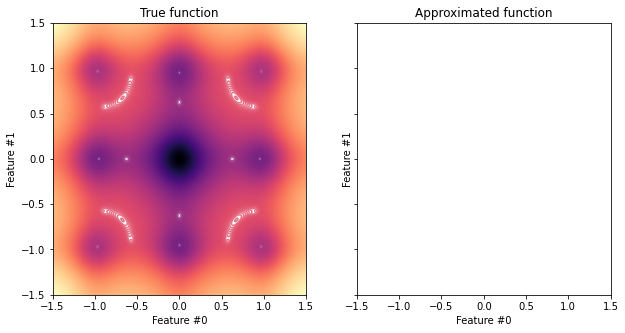

In [13]:
# Visialize the approximation accuracy.
plot_2D_functions(banana, approx_banana, plot_x_lim=3.5, plot_y_lim=9, plot_nb_contours=280)